In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Check that the file was uploaded by listing the current working directory.
import os
print("Files in current directory:", os.listdir("."))


Files in current directory: ['.ipynb_checkpoints', 'new_data.csv', 'project-Copy1.ipynb']


In [5]:
data = pd.read_csv('new_data.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 0
Float variables: 5


In [9]:
total_amount = data['amount'].sum()
print(f"Total Amount Transferred: {total_amount}")


Total Amount Transferred: 1144392944759.77


In [10]:
total_fraud_amount = data[data['isFraud'] == 1]['amount'].sum()
print(f"Total Fraud Amount: {total_fraud_amount}")


Total Fraud Amount: 12056415427.839998


In [11]:
total_non_fraud_amount = data[data['isFraud'] == 0]['amount'].sum()
print(f"Total Non-Fraud Amount: {total_non_fraud_amount}")


Total Non-Fraud Amount: 1132336529331.9312


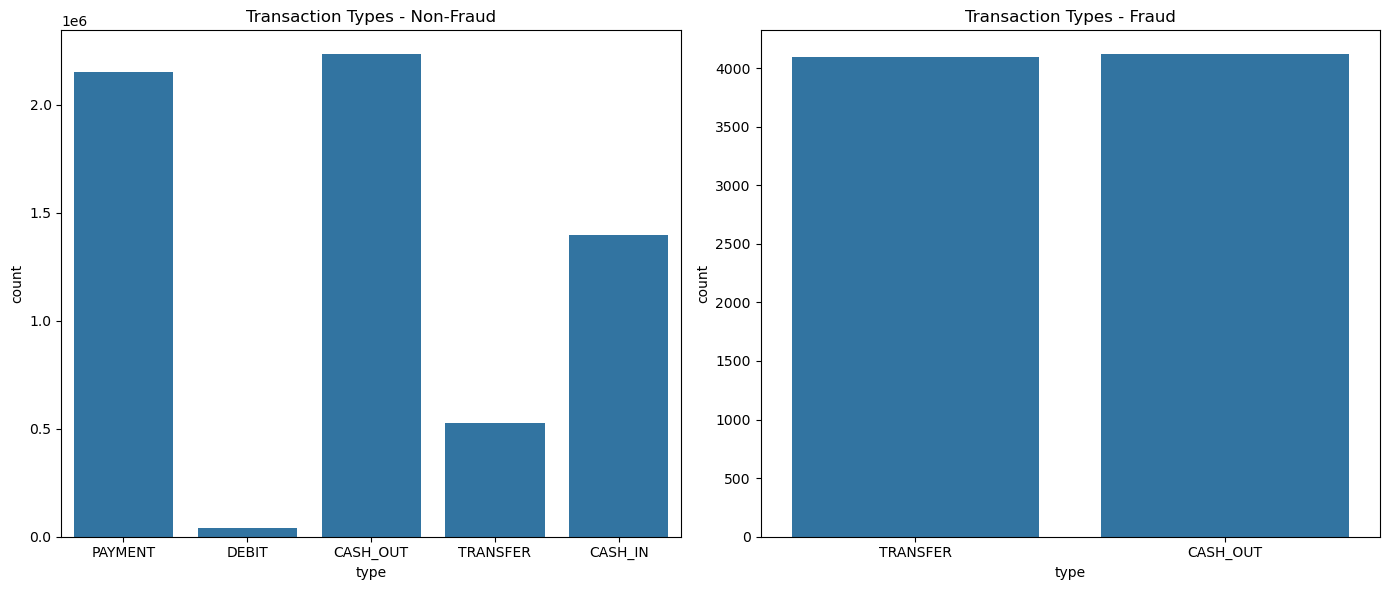

In [12]:
# Filter the dataset
fraud_data = data[data['isFraud'] == 1]
non_fraud_data = data[data['isFraud'] == 0]

# Set up the plotting area
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot for non-fraud transactions
sns.countplot(x='type', data=non_fraud_data, ax=axes[0])
axes[0].set_title('Transaction Types - Non-Fraud')

# Countplot for fraud transactions
sns.countplot(x='type', data=fraud_data, ax=axes[1])
axes[1].set_title('Transaction Types - Fraud')

plt.tight_layout()
plt.show()

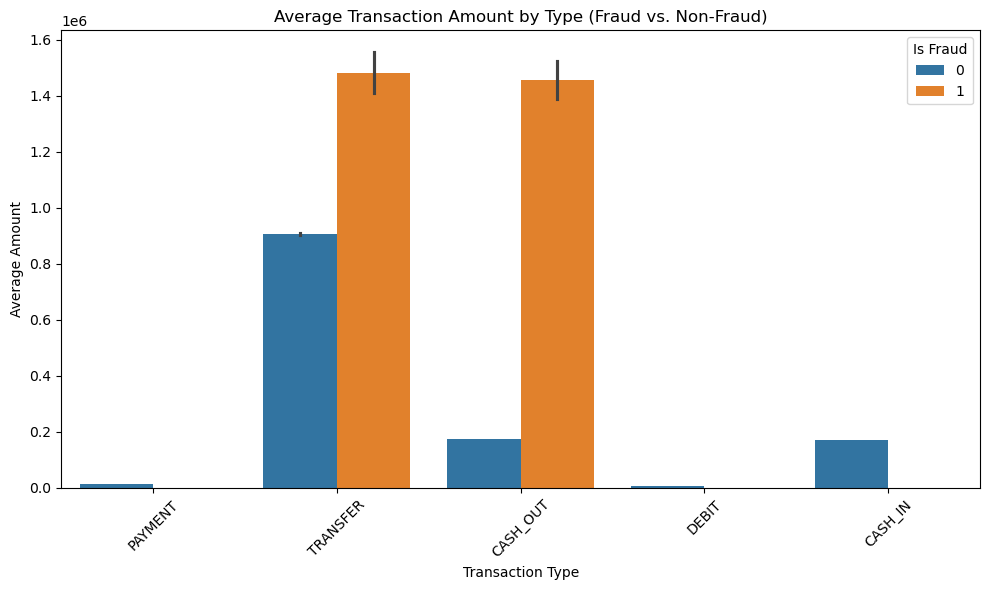

In [13]:
plt.figure(figsize=(10, 6))

# Barplot with fraud status as hue
sns.barplot(x='type', y='amount', hue='isFraud', data=data)

plt.title('Average Transaction Amount by Type (Fraud vs. Non-Fraud)')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount')
plt.legend(title='Is Fraud')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

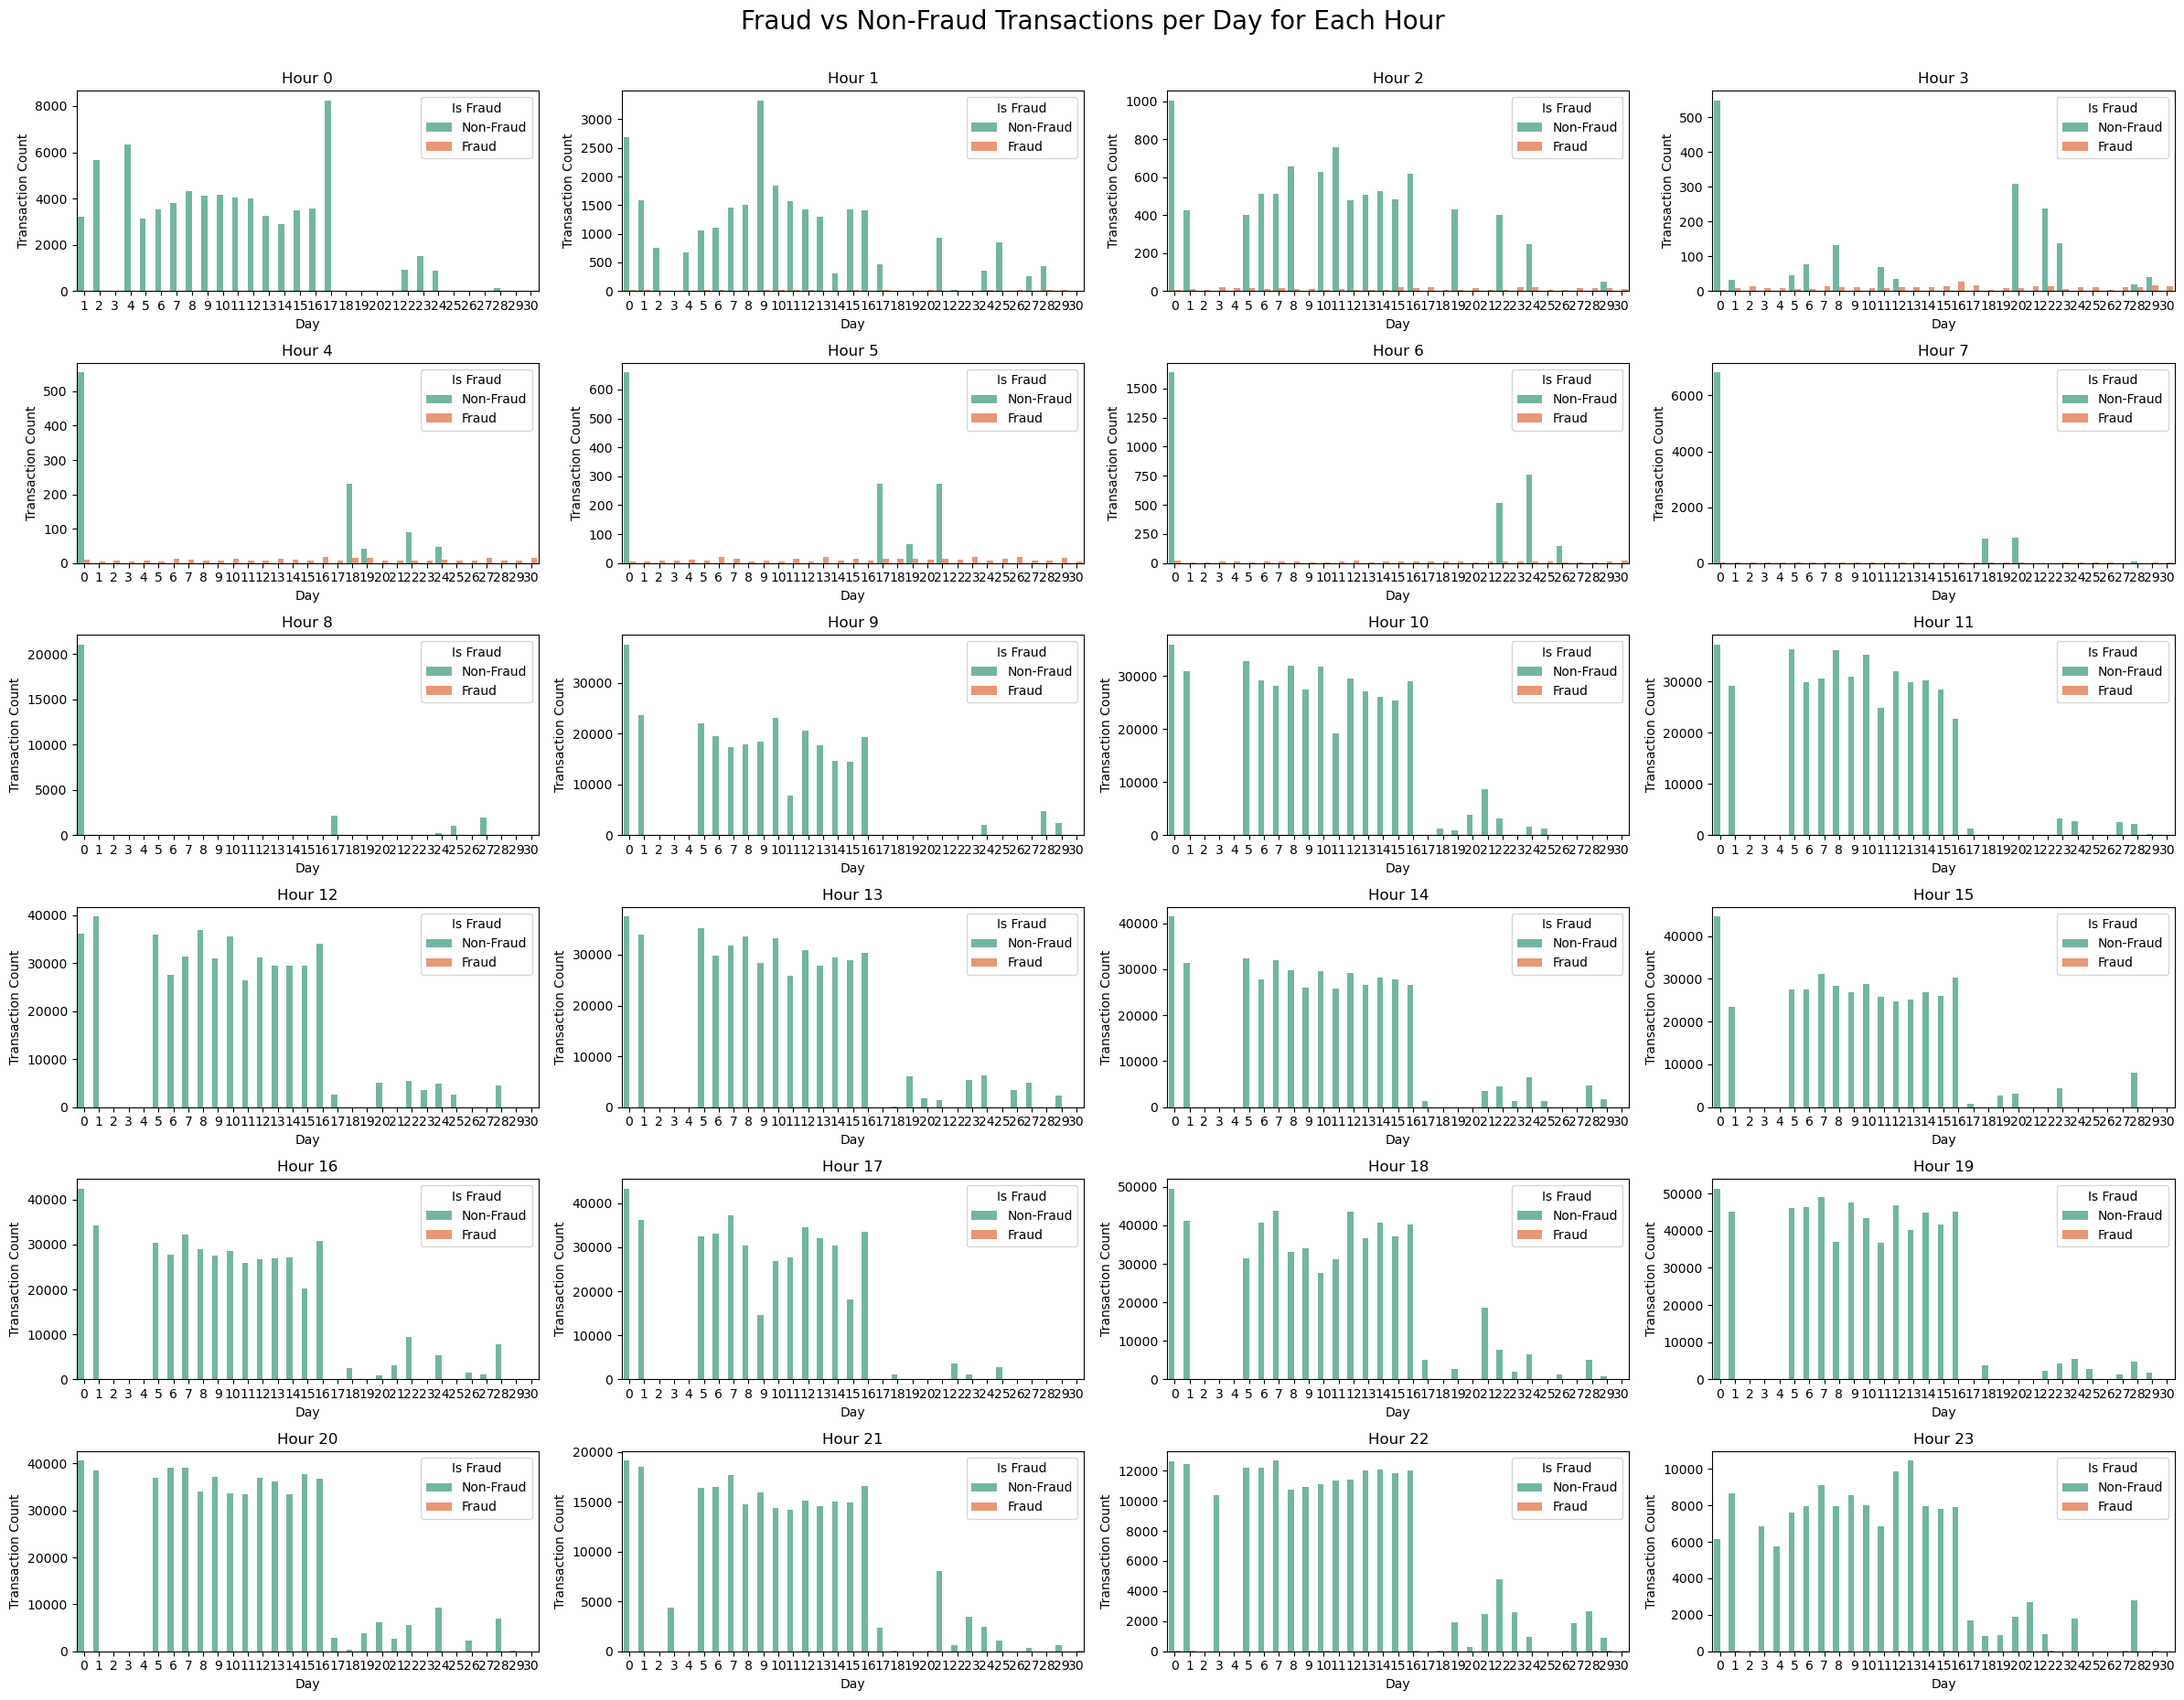

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create 'hour' and 'day' from 'step'
data['hour'] = data['step'] % 24
data['day'] = data['step'] // 24

# Create 24 subplots (6 rows x 4 columns)
fig, axes = plt.subplots(6, 4, figsize=(24, 18))
axes = axes.flatten()

# Plot for each hour (0–23)
for hour in range(24):
    ax = axes[hour]
    hour_data = data[data['hour'] == hour]

    # Plot barplot of count per day for each is_fraud category
    sns.countplot(x='day', hue='isFraud', data=hour_data, ax=ax, palette='Set2')
    
    ax.set_title(f'Hour {hour}')
    ax.set_xlabel('Day')
    ax.set_ylabel('Transaction Count')
    ax.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])

# Final layout adjustments
plt.tight_layout()
plt.suptitle('Fraud vs Non-Fraud Transactions per Day for Each Hour', fontsize=20, y=1.03)
plt.show()


<Axes: >

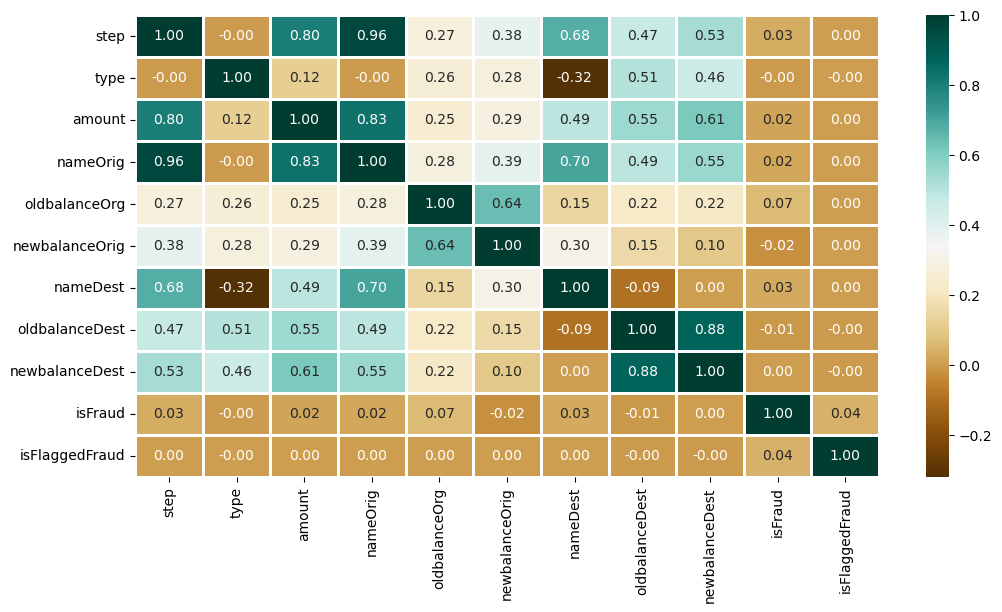

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [16]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [17]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [18]:
X.shape, y.shape

((6362620, 11), (6362620,))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [20]:
!pip install xgboost

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.metrics import roc_auc_score
scale = len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # ratio of class 0 to class 1

models = [
    LogisticRegression(class_weight='balanced',max_iter=1000),
    XGBClassifier(eval_metric='logloss',scale_pos_weight=scale,n_estimators=100,max_depth=5,learning_rate=0.1),
    RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7,class_weight='balanced',max_depth = 10)
]

for model in models:
    model.fit(X_train, y_train)
    print(f'{model.__class__.__name__} :')

    train_preds = model.predict_proba(X_train)[:, 1]
    print('Training AUC : ', roc_auc_score(y_train, train_preds))

    test_preds = model.predict_proba(X_test)[:, 1]
    print('Validation AUC : ', roc_auc_score(y_test, test_preds))
    print()


LogisticRegression :
Training AUC :  0.986227135774174
Validation AUC :  0.9853040914506657

XGBClassifier :
Training AUC :  0.9998360755725909
Validation AUC :  0.9990173416194355

RandomForestClassifier :
Training AUC :  0.9996174853446489
Validation AUC :  0.9981186662129894



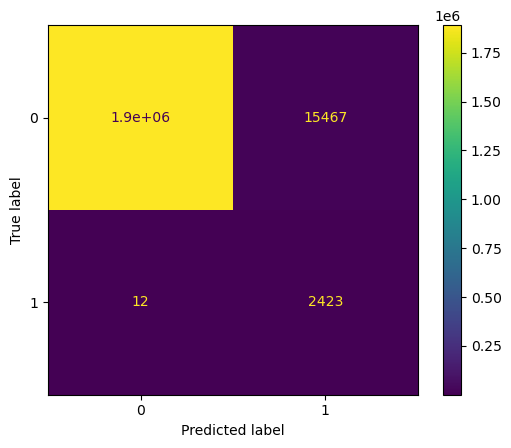

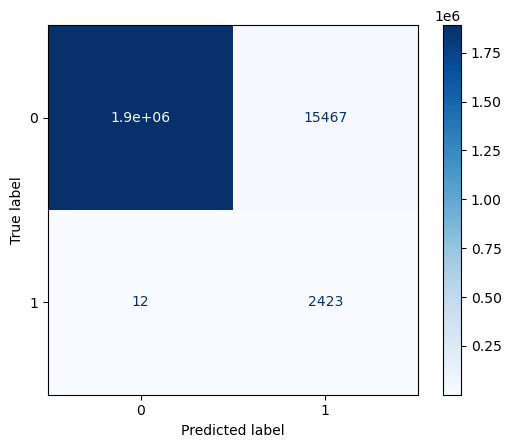

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test)

cm.plot(cmap='Blues')

plt.show()
